This notebook is a simple yet an effective approach to Machine Learning for the Titanic dataset. After having gone through multiple notebooks and approaches, I have come to realize that the simpler the approach, the better the results for this dataset. The more complexity in feature engineering I applied, the more the model overfit, giving poor results on the test dataset. 

This notebook does not explain ML concepts, but concludes learnings and findings wherever necessary. It follows a very straight forward step by step ML approach with simple python commands.

It follows the following steps:
* Basic exploratory data analysis
* Analyzing features with the target column
* Feature engineering
* Treating missing values
* Feature engineering continued
* Dropping redundant features
* Creating dummies for all features
* Separating target and features
* Predictive modeling
* Hyperparameter tuning using grid search
* Comparing accuracy scores

If you have any questions or feedback, please let me know in the comment section. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings(action="ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv', index_col='PassengerId')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv', index_col='PassengerId')

### Basic exploratory data analysis

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


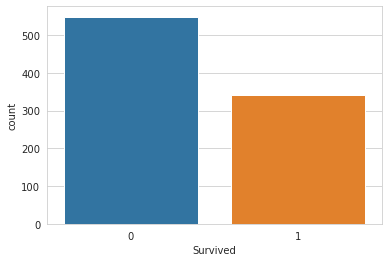

In [7]:
# Understanding the target class is very important

sns.countplot('Survived', data=df)

In [8]:
100.0*df['Survived'].value_counts() / len(df)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

- Training data contains 891 samples (40%) compared to 2205 total passengers on board
- 61.6% of the people did not survive
- 38.38% of the people survived comapred to the 32% survival rate of the complete dataset

In [9]:
df.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

### Analysing features with the target column

#### Pclass, Sex, SibSp, Parch

In [10]:
df[['Pclass','Survived']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
df[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values('Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
df[['Parch','Survived']].groupby('Parch', as_index=False).mean().sort_values('Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


- 69% of Pclss=1 passangers survived
- 74% of females survived
- Passangers with lesser SibSp have a higher survival rate
- SibSp and Parch have zero correlation for certain values

#### Age

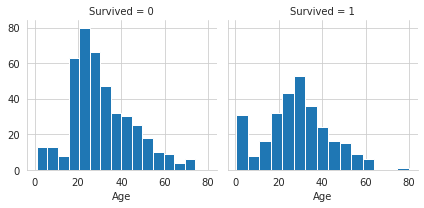

In [14]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=15)

- Infants (age<5) have a high survival rate
- Oldest peole (age=80) all survived
- Most passangers in 15-25 age range, highest mortality rate in that range

#### Pclass, Survived Vs. Age

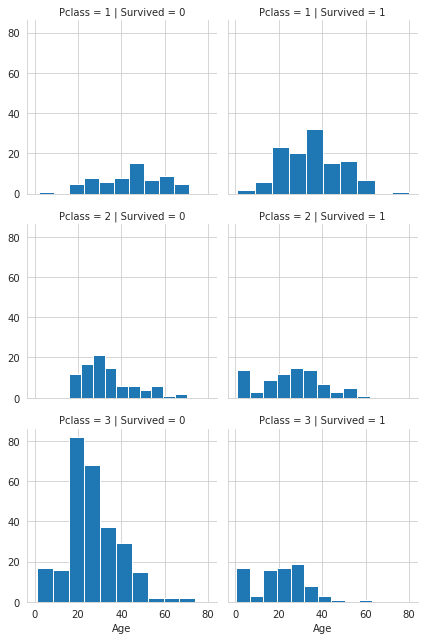

In [15]:
g = sns.FacetGrid(df, col='Survived', row='Pclass')
g.map(plt.hist, 'Age')

- Infants with Pclass 1 and 2 mostly survived
- Most adults in Pclass 3 did not surivive
- Most passangers in Pclass 1 survived

#### Embarked

In [16]:
df[['Embarked','Survived']].groupby('Embarked', as_index=False).mean().sort_values('Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [17]:
100.0*df['Embarked'].value_counts() / len(df)

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

- 72% of the passengers on board embarked from port S
- Port S also has the highest number of survivors, 55%

### Feature Engineering

Make sure to perform actions simultaneously on both, the train and test dataset

#### Extracting Title from the Name feature

In [18]:
df['Title'] = df.Name.str.extract('([A-Za-z]+)\.')
test_df['Title'] = test_df.Name.str.extract('([A-Za-z]+)\.')

In [19]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [20]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Lady          1
Mme           1
Capt          1
Sir           1
Don           1
Countess      1
Ms            1
Jonkheer      1
Name: Title, dtype: int64

#### Merging Titles 
Comparing Titles with the Sex feature to figure out how rarely used titles can be merged with other titles

In [21]:
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
replace_titles = ['Capt','Col','Countess','Don','Jonkheer','Lady','Major','Dr','Rev','Sir']

In [23]:
df['Title'] = df['Title'].replace(replace_titles, 'other')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [24]:
df[['Title','Survived']].groupby('Title').mean().sort_values('Survived', ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
other,0.347826
Mr,0.156673


In [25]:
test_df['Title'] = test_df['Title'].replace(replace_titles, 'other')
test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss')
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')

In [26]:
pd.crosstab(test_df['Title'], test_df['Sex'])

Sex,female,male
Title,,
Dona,1,0
Master,0,21
Miss,79,0
Mr,0,240
Mrs,72,0
other,0,5


Oh, test set has another unique title called 'dona', merging that with other

In [27]:
test_df['Title'] = test_df['Title'].replace('Dona', 'other')

### Treating Mising Values before performing further Feature Engineering

In [28]:
df.isnull().sum().sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
Title         0
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

In [29]:
test_df.isnull().sum().sort_values(ascending=False)

Cabin       327
Age          86
Fare          1
Title         0
Embarked      0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
dtype: int64

#### Filling missing values for age based on mean age per Title

In [30]:
print('Number of age entries missing for title Miss:', df[df['Title'] == 'Miss']['Age'].isnull().sum())
print('Number of age entries missing for title Mr:', df[df['Title'] == 'Mr']['Age'].isnull().sum())
print('Number of age entries missing for title Mrs:', df[df['Title'] == 'Mrs']['Age'].isnull().sum())
print('Number of age entries missing for title other:', df[df['Title'] == 'other']['Age'].isnull().sum())
print('Number of age entries missing for title Master:', df[df['Title'] == 'Master']['Age'].isnull().sum())

Number of age entries missing for title Miss: 36
Number of age entries missing for title Mr: 119
Number of age entries missing for title Mrs: 17
Number of age entries missing for title other: 1
Number of age entries missing for title Master: 4


In [31]:
print('Mean age for title Miss:', df[df['Title'] == 'Miss']['Age'].mean())
print('Mean age for title Mr:', df[df['Title'] == 'Mr']['Age'].mean())
print('Mean age for title Mrs:', df[df['Title'] == 'Mrs']['Age'].mean())
print('Mean age for title other:', df[df['Title'] == 'other']['Age'].mean())
print('Mean age for title Master:', df[df['Title'] == 'Master']['Age'].mean())

Mean age for title Miss: 21.845637583892618
Mean age for title Mr: 32.368090452261306
Mean age for title Mrs: 35.788990825688074
Mean age for title other: 45.54545454545455
Mean age for title Master: 4.574166666666667


In [32]:
df.loc[(df['Title']== 'Miss') & (df['Age'].isnull()), 'Age'] = 22
df.loc[(df['Title']== 'Mr') & (df['Age'].isnull()), 'Age'] = 32
df.loc[(df['Title']== 'Mrs') & (df['Age'].isnull()), 'Age'] = 36
df.loc[(df['Title']== 'other') & (df['Age'].isnull()), 'Age'] = 46
df.loc[(df['Title']== 'Master') & (df['Age'].isnull()), 'Age'] = 5

In [33]:
df.isnull().sum().sort_values(ascending=False)

Cabin       687
Embarked      2
Title         0
Fare          0
Ticket        0
Parch         0
SibSp         0
Age           0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

In [34]:
# Repeating the steps for test set

print('Number of age entries missing for title Miss:', test_df[test_df['Title'] == 'Miss']['Age'].isnull().sum())
print('Number of age entries missing for title Mr:', test_df[test_df['Title'] == 'Mr']['Age'].isnull().sum())
print('Number of age entries missing for title Mrs:', test_df[test_df['Title'] == 'Mrs']['Age'].isnull().sum())
print('Number of age entries missing for title other:', test_df[test_df['Title'] == 'other']['Age'].isnull().sum())
print('Number of age entries missing for title Master:', test_df[test_df['Title'] == 'Master']['Age'].isnull().sum())

Number of age entries missing for title Miss: 15
Number of age entries missing for title Mr: 57
Number of age entries missing for title Mrs: 10
Number of age entries missing for title other: 0
Number of age entries missing for title Master: 4


In [35]:
print('Mean age for title Miss:', test_df[test_df['Title'] == 'Miss']['Age'].mean())
print('Mean age for title Mr:', test_df[test_df['Title'] == 'Mr']['Age'].mean())
print('Mean age for title Mrs:', test_df[test_df['Title'] == 'Mrs']['Age'].mean())
print('Mean age for title other:', test_df[test_df['Title'] == 'other']['Age'].mean())
print('Mean age for title Master:', test_df[test_df['Title'] == 'Master']['Age'].mean())

Mean age for title Miss: 21.774843750000002
Mean age for title Mr: 32.0
Mean age for title Mrs: 38.903225806451616
Mean age for title other: 43.833333333333336
Mean age for title Master: 7.406470588235294


In [36]:
test_df.loc[(test_df['Title']== 'Miss') & (test_df['Age'].isnull()), 'Age'] = 22
test_df.loc[(test_df['Title']== 'Mr') & (test_df['Age'].isnull()), 'Age'] = 32
test_df.loc[(test_df['Title']== 'Mrs') & (test_df['Age'].isnull()), 'Age'] = 39
test_df.loc[(test_df['Title']== 'other') & (test_df['Age'].isnull()), 'Age'] = 44
test_df.loc[(test_df['Title']== 'Master') & (test_df['Age'].isnull()), 'Age'] = 7

In [37]:
test_df.isnull().sum().sort_values(ascending=False)

Cabin       327
Fare          1
Title         0
Embarked      0
Ticket        0
Parch         0
SibSp         0
Age           0
Sex           0
Name          0
Pclass        0
dtype: int64

#### Filling in missing values in train set for Embarked 
Filling in missing values with most_frequent i.e. S

In [38]:
df['Embarked'] = df['Embarked'].fillna('S')

#### Filling in missing values in test set for Fare

In [39]:
test_df.loc[test_df['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [40]:
# Finding out the mean Fare for Pclass=3

test_df[test_df['Pclass']==3]['Fare'].mean()

12.459677880184334

In [41]:
test_df['Fare'] = test_df['Fare'].fillna(12.46)

#### Cabin

In [42]:
print('Percentage of cabin values missing in train set:', 100.0*df['Cabin'].isnull().sum() / len(df))
print('Percentage of cabin values missing in test set:', 100.0*test_df['Cabin'].isnull().sum() / len(df))

Percentage of cabin values missing in train set: 77.10437710437711
Percentage of cabin values missing in test set: 36.7003367003367


Too many values for the Cabin feature are missing. Also, it isn't a very useful feature. So drop this feature.

In [43]:
print('Missing values for train set')
print(df.isnull().sum().sort_values(ascending=False))
print('----------------')
print('Missing values for test set')
print(test_df.isnull().sum().sort_values(ascending=False))

Missing values for train set
Cabin       687
Title         0
Embarked      0
Fare          0
Ticket        0
Parch         0
SibSp         0
Age           0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64
----------------
Missing values for test set
Cabin       327
Title         0
Embarked      0
Fare          0
Ticket        0
Parch         0
SibSp         0
Age           0
Sex           0
Name          0
Pclass        0
dtype: int64


All missing values have been treated apart from Cabin which will be dropped later

### Feature Engineering continued...

In [44]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


#### Grouping ages in Age feature and assigning values based on their survival rate

In [45]:
# Creating a new column for age groups

df['AgeGroup'] = pd.cut(df['Age'],5)

In [46]:
df[['AgeGroup', 'Survived']].groupby('AgeGroup', as_index=False).mean().sort_values('Survived', ascending=False)

,AgeGroup,Survived
0,"(0.34, 16.336]",0.548077
2,"(32.252, 48.168]",0.436893
3,"(48.168, 64.084]",0.434783
1,"(16.336, 32.252]",0.327345
4,"(64.084, 80.0]",0.090909


Assigning values based on the above age groups. The groups with higher survival rate will be assigned a higher number. So <=16 will be 4, >32 but <=48 will be 3 and so on and so forth

In [47]:
df.loc[df['Age'] <= 16, 'Age'] = 4
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 3
df.loc[(df['Age'] >48) & (df['Age'] <= 64), 'Age'] = 2
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 64), 'Age'] = 0

In [48]:
df = df.drop('AgeGroup', axis=1)

for the test set, use the age group results from the train set itself as the test set does not have the target class to be able to do the same analysis

In [49]:
test_df.loc[test_df['Age'] <= 16, 'Age'] = 4
test_df.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'Age'] = 3
test_df.loc[(test_df['Age'] >48) & (test_df['Age'] <= 64), 'Age'] = 2
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 32), 'Age'] = 1
test_df.loc[(test_df['Age'] > 64), 'Age'] = 0

In [50]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,Mr


#### Grouping fares in Fare feature and assigning values based on their survival rate

In [51]:
df[['Fare','Pclass']].groupby('Pclass', as_index=False).mean()

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [52]:
df['Fare'].min()

0.0

In [53]:
df['Fare'].max()

512.3292

In [54]:
df['fareband'] = pd.cut(df['Fare'], 4)

In [55]:
df[['fareband', 'Survived']].groupby('fareband', as_index=False).mean().sort_values('Survived', ascending=False)

,fareband,Survived
3,"(384.247, 512.329]",1.000000
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
0,"(-0.512, 128.082]",0.368113


In [56]:
df.loc[(df['Fare'] >= 384), 'Fare'] = 3
df.loc[(df['Fare'] >= 256) & (df['Fare'] < 384), 'Fare'] = 2
df.loc[(df['Fare'] >=128) & (df['Fare'] < 256), 'Fare'] = 1
df.loc[df['Fare'] < 128, 'Fare'] = 0

In [57]:
df = df.drop('fareband', axis=1)

In [58]:
# Repeating the steps for the test set

test_df.loc[(test_df['Fare'] >= 384), 'Fare'] = 3
test_df.loc[(test_df['Fare'] >= 256) & (test_df['Fare'] < 384), 'Fare'] = 2
test_df.loc[(test_df['Fare'] >=128) & (test_df['Fare'] < 256), 'Fare'] = 1
test_df.loc[test_df['Fare'] < 128, 'Fare'] = 0

In [59]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,0.0,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,0.0,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,0.0,NaN,S,Mr


#### Combining SibSp and Parch to create FamilySize feature

In [60]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

The logic adding adding 1 is for solo passengers that don't have any siblings/spouses or parents/children. This feature takes care of all the information in the features SibSp and Parch. We can effectively drop those two features now.

In [61]:
# lets take a final look at our dataframe before processing it further

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,NaN,S,Mr,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,0.0,C85,C,Mrs,2
3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,Miss,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,0.0,C123,S,Mrs,2
5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,0.0,NaN,S,Mr,1


Looks good. 

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Cabin       204 non-null    object 
 10  Embarked    891 non-null    object 
 11  Title       891 non-null    object 
 12  FamilySize  891 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 137.5+ KB


### Dropping redundant features

In [63]:
drop_cols = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']

In [64]:
df = df.drop(drop_cols, axis=1)
test_df = test_df.drop(drop_cols, axis=1)

In [65]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
PassengerId,,,,,,,,
1,0,3,male,1.0,0.0,S,Mr,2
2,1,1,female,3.0,0.0,C,Mrs,2
3,1,3,female,1.0,0.0,S,Miss,1
4,1,1,female,3.0,0.0,S,Mrs,2
5,0,3,male,3.0,0.0,S,Mr,1


### Creating dummies for all features

In [66]:
dummy_cols = ['Pclass','Sex', 'Age',  'Fare', 'Embarked', 'Title', 'FamilySize']
prefix_cats = ['pcl', 'sex', 'age', 'fare', 'emb', 'title', 'fsize']

df = pd.get_dummies(df, columns=dummy_cols, prefix=prefix_cats, drop_first=True)
test_df = pd.get_dummies(test_df, columns=dummy_cols, prefix=prefix_cats, drop_first=True)

In [67]:
df.head()

,Survived,pcl_2,pcl_3,sex_male,age_1.0,age_2.0,age_3.0,age_4.0,emb_Q,emb_S,title_Miss,title_Mr,title_Mrs,title_other,fsize_2,fsize_3,fsize_4,fsize_5,fsize_6,fsize_7,fsize_8,fsize_11
PassengerId,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
5,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [68]:
df.shape

(891, 22)

In [69]:
test_df.shape

(418, 21)

### Separating features and target

In [70]:
X = df.drop('Survived', axis=1)
y = df['Survived']

# Predictive Modeling

The basic approach for predictive modeling is as follows:
- Initialize all the predictors and fit the training data
- Use cross_val_predict instead of splitting the data as it's quite a small dataset
- Generate accuracy score for every model
- Use GridSearachCV for hyperparameter tuning
- Create parameter grids for grid search
- Run grid search and find the best estimator
- Fit the training data this time on the best estimator
- Use grid search on the best estimator and generate accuracy score
- Append the model name, accuracy score, and accuracy score on best estimator to a dataframe for comparison
- Select the model with the best score

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [72]:
# Creating an empty dataframe to add model predictions for comparison

pred_df = pd.DataFrame()

In [73]:
# initialize all the predictors and fit the training data

log_clf = LogisticRegression(random_state=42)
log_clf.fit(X, y)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X, y)

svc_clf = SVC(random_state=42)
svc_clf.fit(X, y)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X, y)

extra_clf = ExtraTreesClassifier(random_state=42)
extra_clf.fit(X, y)

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
# cross_val_predict and generate accuracy scores for all the predictors

log_preds = cross_val_predict(log_clf, X, y, cv=10)
log_acc = accuracy_score(y, log_preds)

sgd_preds = cross_val_predict(sgd_clf, X, y, cv=10)
sgd_acc = accuracy_score(y, sgd_preds)

svc_preds = cross_val_predict(svc_clf, X, y, cv=10)
svc_acc = accuracy_score(y, svc_preds)

tree_preds = cross_val_predict(tree_clf, X, y, cv=10)
tree_acc = accuracy_score(y, tree_preds)

forest_preds = cross_val_predict(forest_clf, X, y, cv=10)
forest_acc = accuracy_score(y, forest_preds)

extra_preds = cross_val_predict(extra_clf, X, y, cv=10)
extra_acc = accuracy_score(y, extra_preds)

gb_preds = cross_val_predict(gb_clf, X, y, cv=10)
gb_acc = accuracy_score(y, gb_preds)

In [75]:
print('log_clf', log_acc)
print('sgd_clf', sgd_acc)
print('svc_clf', svc_acc)
print('tree_clf', tree_acc)
print('forest_clf', forest_acc)
print('extra_clf', extra_acc)
print('gb_clf', gb_acc)

log_clf 0.8181818181818182
sgd_clf 0.797979797979798
svc_clf 0.8327721661054994
tree_clf 0.7934904601571269
forest_clf 0.7946127946127947
extra_clf 0.797979797979798
gb_clf 0.8260381593714927


#### Hyperparameter tuning

In [76]:
# Generating paramater grids for predictors

log_param = [
    {#'penalty':['l1', 'l2', 'elasticnet'],
    'C':[0.001, 0.01, 0.1, 1.0, 10.0]
    }
]

sgd_param = [
    {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    #'penalty':['l1', 'l2', 'elasticnet']
    }
]

svc_param = [
    {'C':[0.001, 0.01, 0.1, 1.0, 10.0],
    'gamma':[0.001, 0.01, 0.1, 1.0],
    'kernel':['rbf', 'sigmoid']}
]

tree_param = [
    {'max_depth':[2,4,8,12,16,20,30],
    'min_samples_split':[2,4,6,8,10],
    'min_samples_leaf':[2,4,6,8,10]
    }
]

forest_param = [
    {'max_depth':[2,4,8,12,16,20],
    'min_samples_split':[2,4,6,8,10],
    'min_samples_leaf':[2,4,6,8,10],
    'n_estimators':[100,200,300]}
]

extra_param = [
    {'max_depth':[2,4,8,12,16,20,30],
    'min_samples_split':[2,4,6,8,10],
    'min_samples_leaf':[2,4,6,8,10]}
]

gb_param = [
    {'max_depth':[2,8,16,20],
    'min_samples_split':[2,4,6,10],
    'min_samples_leaf':[2,4,6,10],
    'learning_rate':[0.01, 0.05, 0.1],
    'n_estimators':[100,200,300],
    'subsample':[0.5, 0.8, 1.0]}
]

In [77]:
log_grid = GridSearchCV(log_clf, log_param, cv=5)
log_grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1.0, 10.0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [78]:
log_best = log_grid.best_estimator_

In [79]:
sgd_grid = GridSearchCV(sgd_clf, sgd_param, cv=5)
sgd_grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=42,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                    100.0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
         

In [80]:
sgd_best = sgd_grid.best_estimator_

In [81]:
svc_grid = GridSearchCV(svc_clf, svc_param, cv=5)
svc_grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                          'gamma': [0.001, 0.01, 0.1, 1.0],
                          'kernel': ['rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [82]:
svc_best = svc_grid.best_estimator_

In [83]:
tree_grid = GridSearchCV(tree_clf, tree_param, cv=5)
tree_grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [2, 4, 8, 12, 16, 20, 30],
              

In [84]:
tree_best = tree_grid.best_estimator_

In [85]:
forest_grid = GridSearchCV(forest_clf, forest_param, cv=5, verbose=1, n_jobs=-1)
forest_grid.fit(X, y)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed:  6.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [86]:
forest_best = forest_grid.best_estimator_

In [87]:
extra_grid = GridSearchCV(extra_clf, extra_param, cv=5, verbose=1, n_jobs=-1)
extra_grid.fit(X, y)

Fitting 5 folds for each of 175 candidates, totalling 875 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 875 out of 875 | elapsed:   59.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [88]:
extra_best = extra_grid.best_estimator_

In [89]:
gb_grid = GridSearchCV(gb_clf, gb_param, cv=5, verbose=1, n_jobs=-1)
gb_grid.fit(X, y)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1164 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1614 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2164 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 2814 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 3564 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 4414 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 5364 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 6414 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 7564 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed: 29.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [90]:
gb_best = gb_grid.best_estimator_

In [91]:
log_best.fit(X, y)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
sgd_best.fit(X, y)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [93]:
svc_best.fit(X, y)

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [94]:
tree_best.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [95]:
forest_best.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [96]:
extra_best.fit(X, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=16, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [97]:
gb_best.fit(X, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [98]:
log_best_preds = cross_val_predict(log_best, X, y, cv=10)
log_best_acc = accuracy_score(y, log_best_preds)

sgd_best_preds = cross_val_predict(sgd_best, X, y, cv=10)
sgd_best_acc = accuracy_score(y, sgd_best_preds)

svc_best_preds = cross_val_predict(svc_best, X, y, cv=10)
svc_best_acc = accuracy_score(y, svc_best_preds)

tree_best_preds = cross_val_predict(tree_best, X, y, cv=10)
tree_best_acc = accuracy_score(y, tree_best_preds)

forest_best_preds = cross_val_predict(forest_best, X, y, cv=10)
forest_best_acc = accuracy_score(y, forest_best_preds)

extra_best_preds = cross_val_predict(extra_best, X, y, cv=10)
extra_best_acc = accuracy_score(y, extra_best_preds)

gb_best_preds = cross_val_predict(gb_best, X, y, cv=10)
gb_best_acc = accuracy_score(y, gb_best_preds)

In [99]:
pred_df = pred_df.append({'b.Best Estimtor Accuracy': log_best_acc, 'b.Accuracy': log_acc, 'a.Model':'log_clf'}, ignore_index=True)
pred_df = pred_df.append({'b.Best Estimtor Accuracy': sgd_best_acc, 'b.Accuracy': sgd_acc, 'a.Model':'sgd_clf'}, ignore_index=True)
pred_df = pred_df.append({'b.Best Estimtor Accuracy': svc_best_acc, 'b.Accuracy': svc_acc, 'a.Model':'svc_clf'}, ignore_index=True)
pred_df = pred_df.append({'b.Best Estimtor Accuracy': tree_best_acc, 'b.Accuracy': tree_acc, 'a.Model':'tree_clf'}, ignore_index=True)
pred_df = pred_df.append({'b.Best Estimtor Accuracy': forest_best_acc, 'b.Accuracy': forest_acc, 'a.Model':'forest_clf'}, ignore_index=True)
pred_df = pred_df.append({'b.Best Estimtor Accuracy': extra_best_acc, 'b.Accuracy': extra_acc, 'a.Model':'extra_clf'}, ignore_index=True)
pred_df = pred_df.append({'b.Best Estimtor Accuracy': gb_best_acc, 'b.Accuracy': gb_acc, 'a.Model':'gb_clf'}, ignore_index=True)

#### Comparing accuracy scores

In [100]:
pred_df

,a.Model,b.Accuracy,b.Best Estimtor Accuracy
0,log_clf,0.818182,0.818182
1,sgd_clf,0.797980,0.822671
2,svc_clf,0.832772,0.835017
3,tree_clf,0.793490,0.813692
4,forest_clf,0.794613,0.826038
5,extra_clf,0.797980,0.826038
6,gb_clf,0.826038,0.832772


Looks like svc_clf and gb_clf are performing best with sgd_clf, forest_clf, and extra_clf close behind it.
Outputting predictions from svc_clf and gb_clf to a csv document for submission. When the scores for multiple models are similar, due to overfitting either model may perform better on the unseen test dataset. So experimenting with both.

*I'm also going to submit predictions from the Random Forest model as in my experience random forests tend perform very well on unseen test datasets

In [101]:
svc_test_preds = svc_best.predict(test_df)

In [102]:
gb_test_preds = gb_best.predict(test_df)

In [103]:
forest_test_preds = forest_best.predict(test_df)

In [104]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv', index_col='PassengerId')
submission['Survived'] = svc_test_preds
submission.to_csv('svc_final_submission.csv')

In [105]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv', index_col='PassengerId')
submission['Survived'] = gb_test_preds
submission.to_csv('gb_final_submission.csv')

In [106]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv', index_col='PassengerId')
submission['Survived'] = forest_test_preds
submission.to_csv('forest_final_submission.csv')